In [1]:
import numpy as np
import matplotlib.pyplot as plt

Discretization: $x_{n+1} = x_n - \delta tx_n + \sqrt{2\delta t}\xi_n$

Assumption: $x_0 = 1$

**Part (ii)**

In [56]:
def create_trajectories(t_save, delta_t,  x0, N=10000):
    x = np.tile(x0,N)
    a = np.sqrt(2*delta_t)
    results = {}
    if 0 in t_save:
        results[0]=x
    for i, t in enumerate(np.arange(0+delta_t, np.max(t_save)+delta_t, delta_t)):
        x = x - delta_t*x + a*np.random.normal(0, 1, N)
        if t in t_save:
            results[t]=x
    return results

In [63]:
results_1 = create_trajectories(t_save=[0, 0.5, 1, 10], delta_t=0.01,  x0=1, N=10000)
results_5 = create_trajectories(t_save=[0, 0.5, 1, 10], delta_t=0.5,  x0=1, N=10000)

In [106]:
result_dicts = {0.01: results_1, 0.5: results_5}

In [152]:
def plot_results(result_dicts):
    delta_t_list = list(result_dicts.keys())
    t_list = list(result_dicts[delta_t_list[0]].keys())
    fig, axes = plt.subplots(4,2, figsize=(12,12))
    for i, ax in enumerate(axes):
        bins=20
        ax[0].hist(result_dicts[delta_t_list[0]][t_list[i]], density=True, bins=bins)
        ax[0].set_ylim([0, 0.55])
        ax[0].grid()
        ax[0].set_title("δt={}, t={}".format(delta_t_list[0], t_list[i]))
        ax[0].set_xlim(-4,4)
        
        ax[1].hist(result_dicts[delta_t_list[1]][t_list[i]], density=True, bins=bins)
        ax[1].set_ylim([0, 0.55])
        ax[1].grid()
        ax[1].set_title("δt={}, t={}".format(delta_t_list[1], t_list[i]))
        ax[1].set_xlim(-4,4)
    plt.tight_layout()

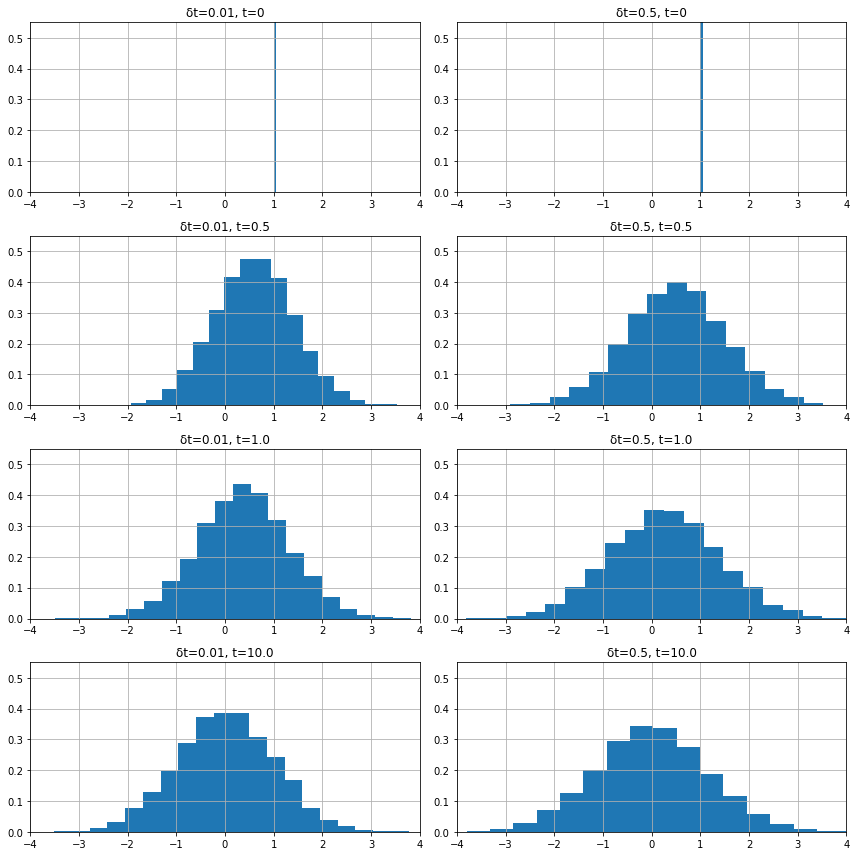

In [153]:
plot_results(result_dicts)

**Part (iii)**
* Both step sizes produce similar distributions, except that for $\delta t=0.5$ the variances are higher. 
* All histograms (except for time step 0) resemble a gaussian curve. That was expected after our computations in part (i). 
* As time continuous the means converge to 0 and the variances of the normal distributions increase. That is not surprising since more time allows for more random terms to sum up and send some trajectories far away from each other. 